In [1]:
!nvidia-smi

Fri Apr  5 00:40:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [4]:
%pwd

'/content'

In [5]:
# 현재 작업 디렉토리를 사용자의 홈 디렉토리로 변경
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

100% 22.8M/22.8M [00:00<00:00, 29.4MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 116MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 117.7ms
Speed: 11.0ms preprocess, 117.7ms inference, 716.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


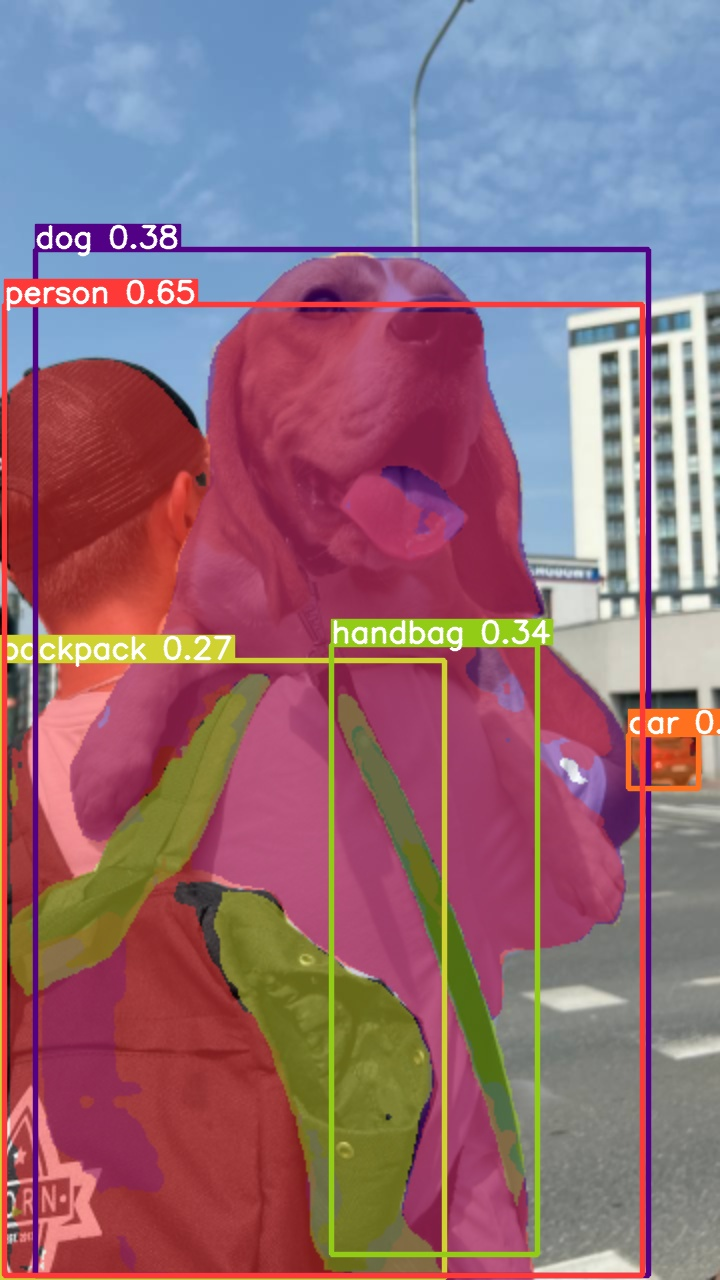

In [6]:
Image(filename='./runs/segment/predict/dog.jpeg', height=600)

In [7]:
!ls

dog.jpeg  runs	yolov8s-seg.pt


https://blog.roboflow.com/how-to-train-yolov8-instance-segmentation/

We'll work with a custom dataset of car parts

In [8]:
%pwd

'/content'

In [10]:
!mkdir ./datasets # 사용자의 홈 디렉토리 내에 datasets라는 이름의 새 디렉토리를 생성
%cd datasets

/content/datasets


In [11]:
!pip install roboflow -q
# Roboflow에서 관리하는 특정 데이터셋을 자신의 작업 환경으로 가져오기
from roboflow import Roboflow # roboflow라는 라이브러리를 설치
rf = Roboflow(api_key="8llqVTheWtnyL2TQi9DI")
project = rf.workspace("alpaco5-f3woi").project("part-autolabeld")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to part-autolabeld-5 in yolov8:: 100%|██████████| 18890/18890 [00:04<00:00, 3867.63it/s]


In [12]:
!ls

part-autolabeld-5


## Custom Training

In [13]:
%cd /content

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/datasets/part-autolabeld-5/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/part-autolabeld-5/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

In [14]:
!ls /content/runs/segment/train

args.yaml					     labels.jpg        train_batch2.jpg
BoxF1_curve.png					     MaskF1_curve.png  val_batch0_labels.jpg
BoxP_curve.png					     MaskP_curve.png   val_batch0_pred.jpg
BoxPR_curve.png					     MaskPR_curve.png  val_batch1_labels.jpg
BoxR_curve.png					     MaskR_curve.png   val_batch1_pred.jpg
confusion_matrix_normalized.png			     results.csv       val_batch2_labels.jpg
confusion_matrix.png				     results.png       val_batch2_pred.jpg
events.out.tfevents.1712280420.5312b1b519d5.12602.0  train_batch0.jpg  weights
labels_correlogram.jpg				     train_batch1.jpg


/content


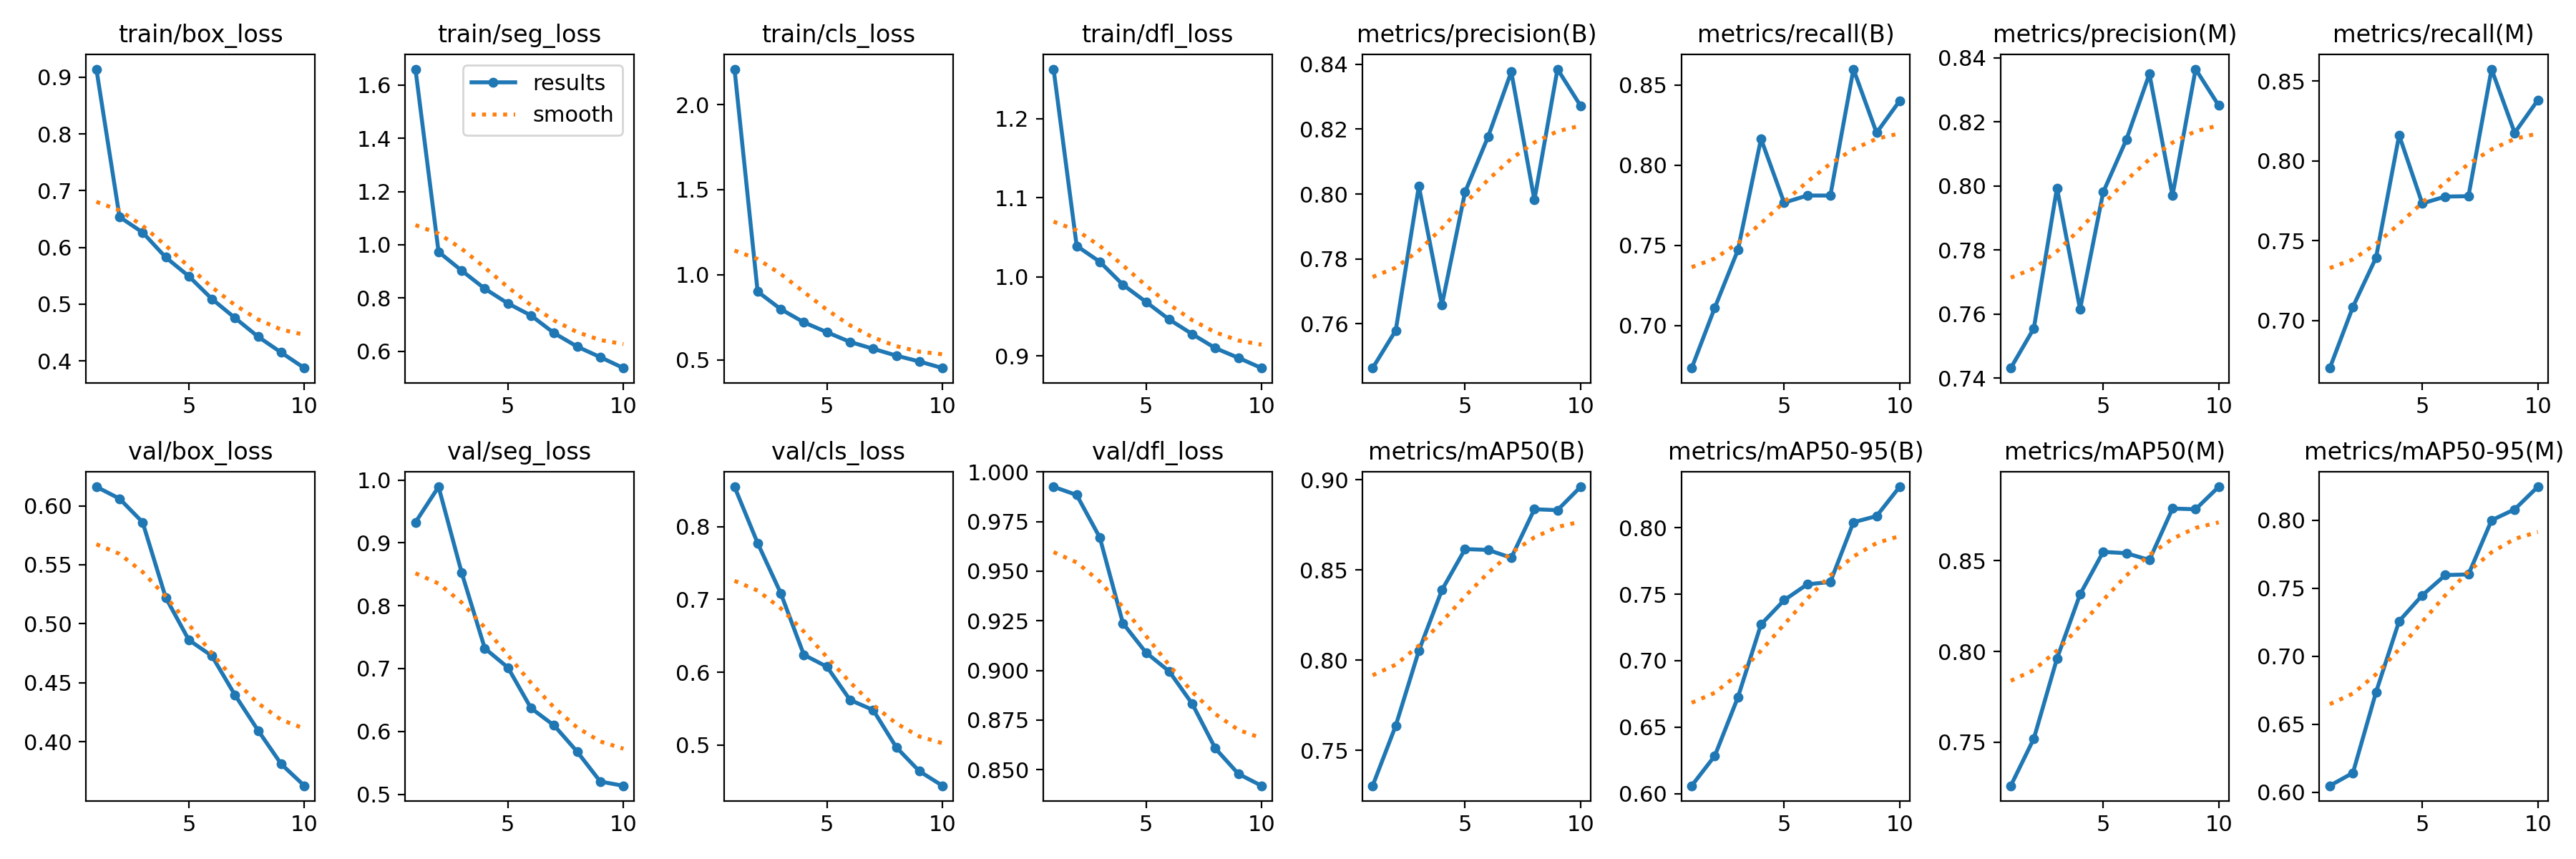

In [27]:
%cd /content
Image(filename='/content/runs/segment/train/results.png', width=1200)

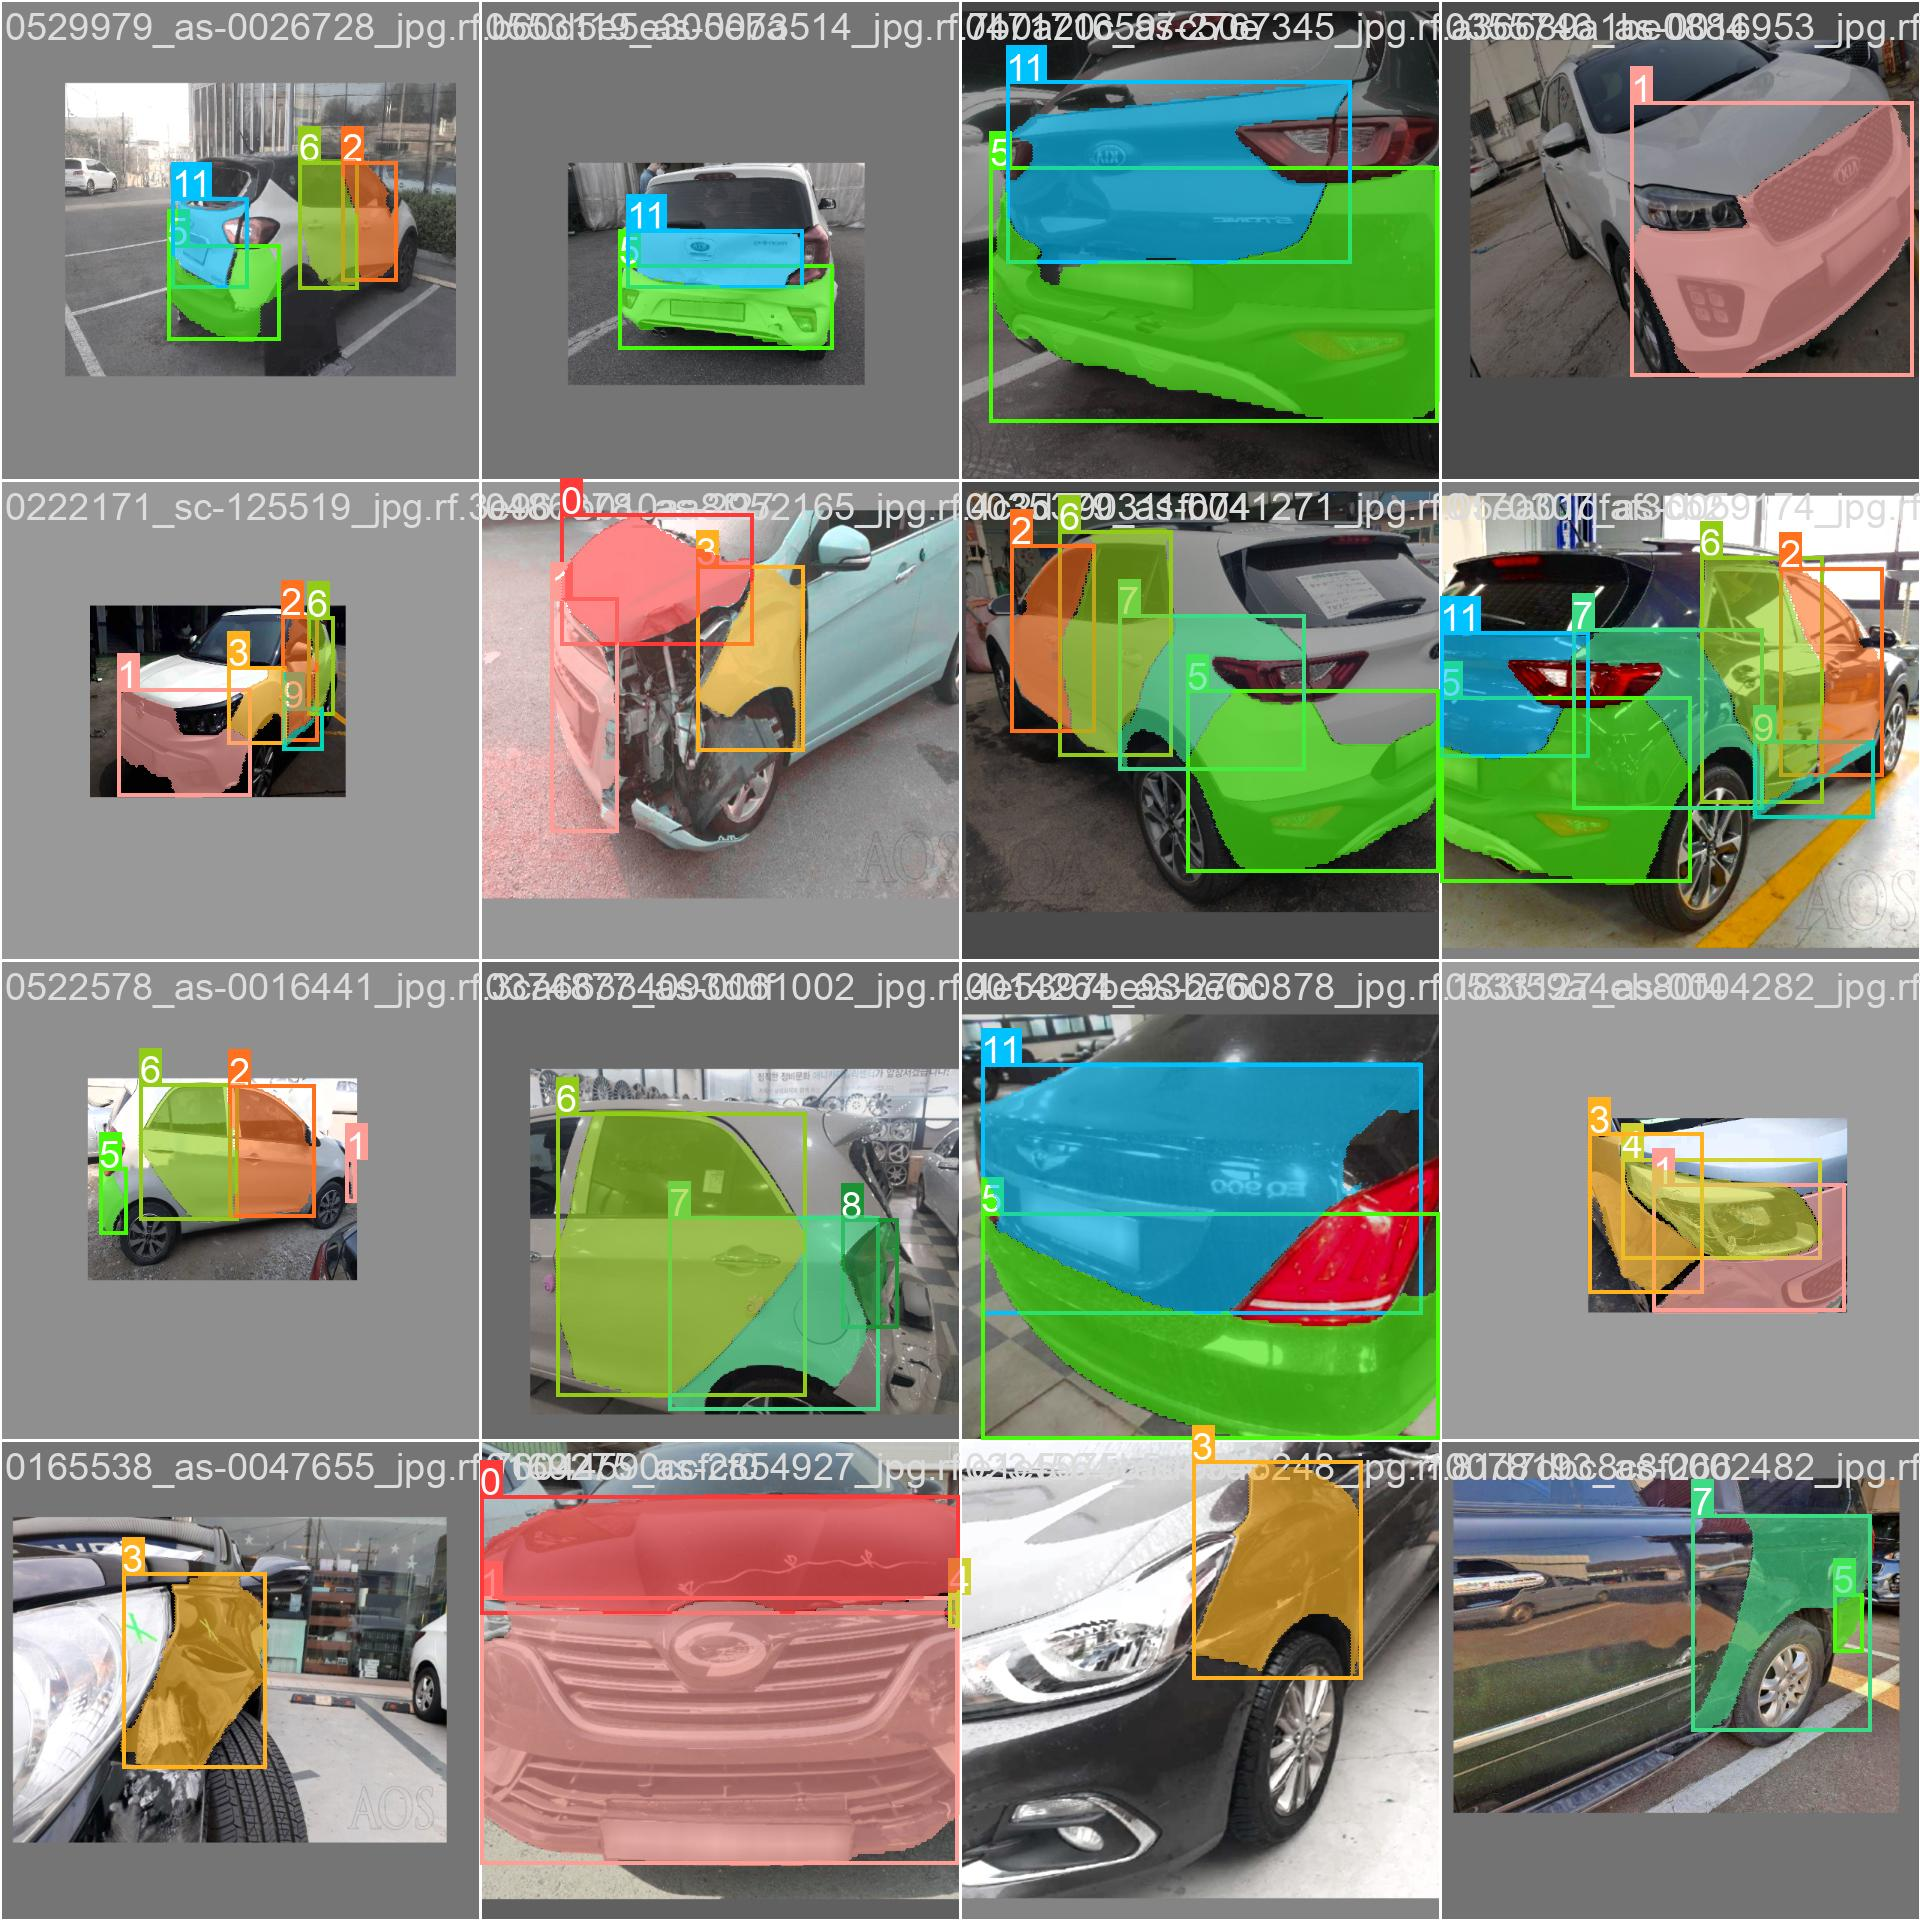

In [29]:
Image(filename='/content/runs/segment/train/train_batch0.jpg', width=1000)

In [21]:
%cd /content
# YOLO 모델을 사용하여 세그멘테이션 작업을 평가 모드에서 실행
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data=/content/datasets/part-autolabeld-5/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785018 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/part-autolabeld-5/valid/labels.cache... 1887 images, 0 backgrounds, 0 corrupt: 100% 1887/1887 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0029502_sc-161833_jpg.rf.f0cc602cbbe567abee8c5e8097684ff0.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0177909_as-0042156_jpg.rf.a43d7ffcbc344ee0d2a2a0a4b7015c87.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0237724_as-0068252_jpg.rf.b365be8c22a06734c9fd1a0774eb1d4c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0259102_sc-150122_jpg.rf.6df8746593987da8438d6d3ff69d6352.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5

In [23]:
%cd /content
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source=/content/datasets/part-autolabeld-5/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785018 parameters, 0 gradients, 42.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/949 /content/datasets/part-autolabeld-5/test/images/0001176_as-0066940_jpg.rf.cb450b3d48f2913b0df9568d9238ec1e.jpg: 480x640 1 Rearbumper, 1 Reardoor, 1 Rearfender, 1 Rockerpanel, 1 Trunklid, 135.3ms
image 2/949 /content/datasets/part-autolabeld-5/test/images/0001299_sc-150389_jpg.rf.0d76318f9f48be6367b7b95600c3e1e0.jpg: 480x640 2 Frontdoors, 16.7ms
image 3/949 /content/datasets/part-autolabeld-5/test/images/0001552_as-0073135_jpg.rf.478764673413e045b3697955661d61a5.jpg: 480x640 1 Bonnet, 1 Frontbumper, 1 Frontdoor, 1 Frontfender, 1 Headlights, 2 Reardoors, 1 Rockerpanel, 16.6ms
image 4/949 /content/datasets/part-autolabeld-5/test/images/0002076_as-0069974_jpg.rf.d46beaab284dcff928f8486d52f36a13.jpg: 480x640 1 Rearlamp, 16.6ms
image 5/949 /content/datasets

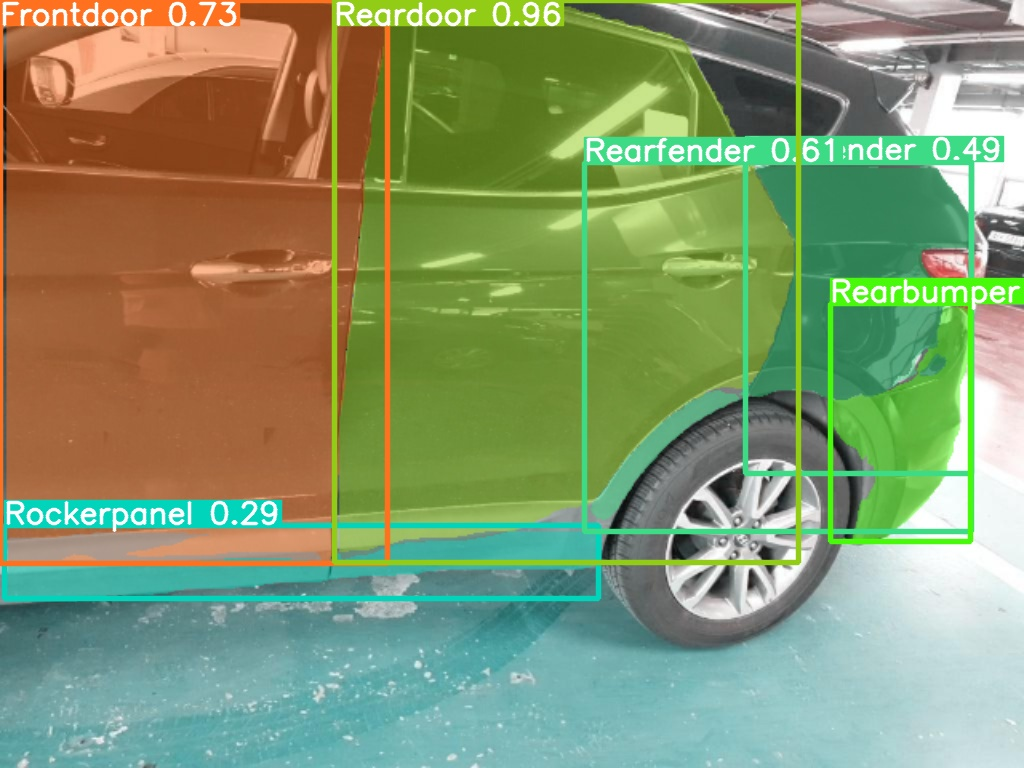

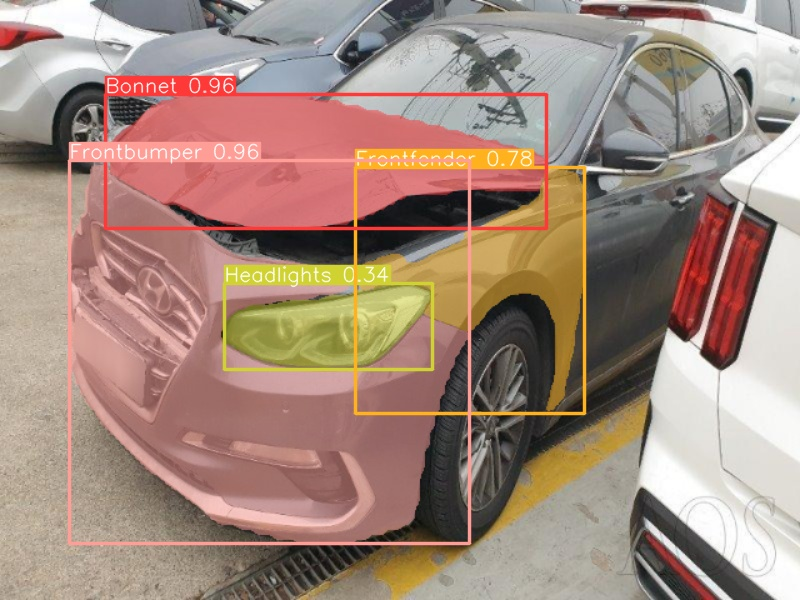

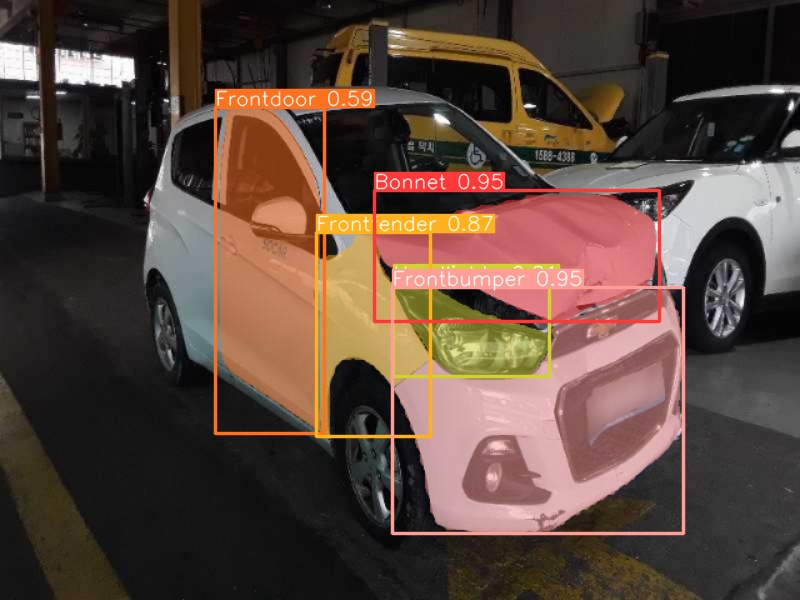

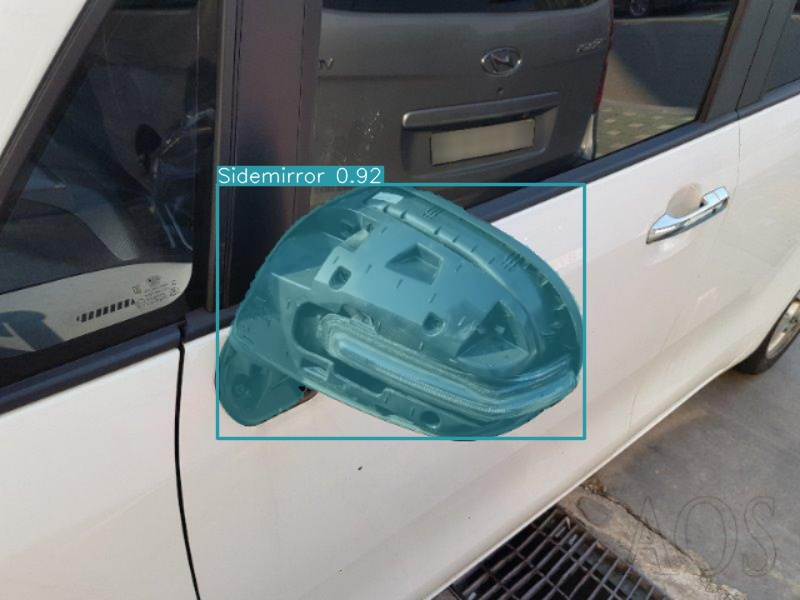

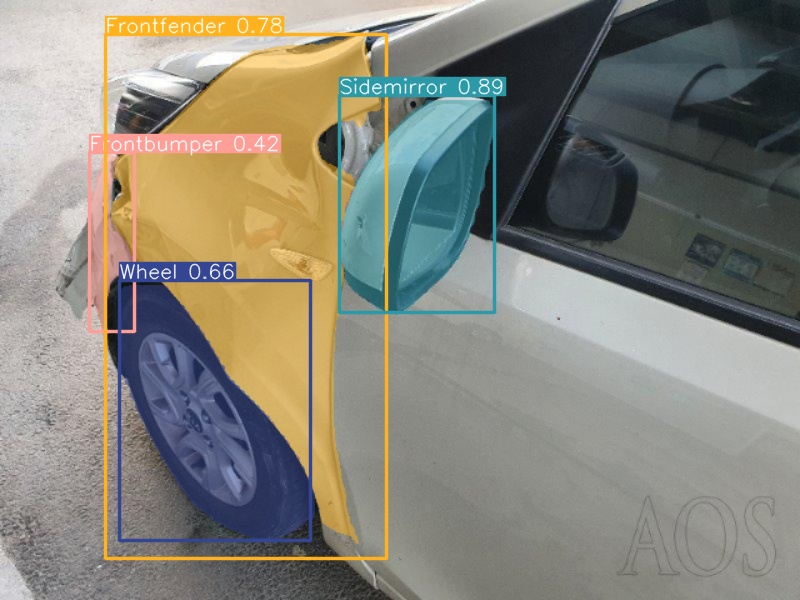

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/segment/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print('\n')

In [ ]:
from google.colab import files

files.download('/content/runs/segment/train/weights/best.pt')